# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.121059e+01     7.555804e+00
 * time: 0.005543947219848633
     1     2.976533e+01     5.934087e+00
 * time: 0.016003847122192383
     2     1.781870e+01     3.168463e+00
 * time: 0.04632401466369629
     3     1.373298e+01     1.937093e+00
 * time: 0.07194089889526367
     4     1.189850e+01     1.298311e+00
 * time: 0.09699797630310059
     5     1.124964e+01     2.240950e+00
 * time: 0.12058281898498535
     6     1.063745e+01     1.116248e+00
 * time: 0.14105796813964844
     7     1.034160e+01     1.074806e+00
 * time: 0.16159987449645996
     8     9.943329e+00     9.460637e-01
 * time: 0.18204879760742188
     9     9.692677e+00     7.684673e-01
 * time: 0.2021198272705078
    10     9.517977e+00     9.994702e-01
 * time: 0.2259979248046875
    11     9.355022e+00     5.893846e-01
 * time: 0.24829792976379395
    12     9.317232e+00     7.463694e-01
 * time: 0.2656838893890381
    13     9.262158e+00     6.460708e-01
 * time: 

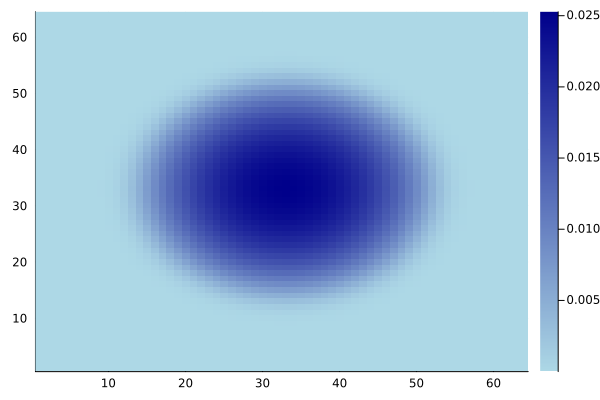

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)